In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [86]:
class_path = "./DataCreation/Dataset/Train_8bit/"
data_train = []
data_train_names = os.listdir(class_path)
pattern = "*.tiff"
for entry in data_train_names:
    if fnmatch.fnmatch(entry, pattern):
            data_train.append(class_path+entry)

In [87]:
print(len(data_train_names), len(data_train))

9456 9456


In [88]:
class_path = "./DataCreation/Dataset/Test_8bit/"
data_test = []
data_test_names = os.listdir(class_path)
pattern = "*.tiff"
for entry in data_test_names:
    if fnmatch.fnmatch(entry, pattern):
            data_test.append(class_path+entry)

In [89]:
print(len(data_test_names), len(data_test))

2707 2707


In [90]:
data_train_list = []
for i in range(len(data_train)):
    arr_obj = []
    cl = (data_train[i].split("/")[4]).split("~~~")[0]
    if cl == "Sy1" or cl == "cv" or cl == "WD" or cl == "QSO": continue
    arr_obj.append(cl)
    arr_obj.append(data_train[i])
    data_train_list.append(arr_obj)
    
data_test_list = []
for i in range(len(data_test)):
    arr_obj = []
    cl = (data_test[i].split("/")[4]).split("~~~")[0]
    if cl == "Sy1" or cl == "cv" or cl == "WD" or cl == "QSO": continue
    arr_obj.append(cl)
    arr_obj.append(data_test[i])
    data_test_list.append(arr_obj)

In [91]:
print(len(data_train_list), len(data_test_list))

6832 1953


In [92]:
df_train = pd.DataFrame(data_train_list)
df_test = pd.DataFrame(data_test_list)

In [93]:
df_train.head()

,0,1
0,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...
1,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...
2,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...
3,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...
4,C,./DataCreation/Dataset/Train_8bit/C~~~0445+010...


In [94]:
df_test.head()

,0,1
0,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...
1,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...
2,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...
3,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...
4,C,./DataCreation/Dataset/Test_8bit/C~~~0833-0605...


In [95]:
df_train[0].value_counts()

sd     2750
C      1655
Mrk    1525
M       770
PN      132
Name: 0, dtype: int64

In [96]:
df_test[0].value_counts()

sd     785
C      470
Mrk    430
M      220
PN      48
Name: 0, dtype: int64

In [97]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train[0])
df_train[0]=le.transform(df_train[0])

In [98]:
df_train[0].value_counts()

4    2750
0    1655
2    1525
1     770
3     132
Name: 0, dtype: int64

In [99]:
for index, Row in df_test.iterrows():
    cl = Row[0]
    if cl == 'sd':
        df_test.at[index, 0] = 4
    elif cl == "C":
        df_test.at[index, 0] = 0
    elif cl == "Mrk":
        df_test.at[index, 0] = 2
    elif cl == "M":
        df_test.at[index, 0] = 1
    elif cl == "PN":
        df_test.at[index, 0] = 3
#    elif cl == "Sy1":
#        df_test.at[index, 0] = 5
#    elif cl == "WD":
#        df_test.at[index, 0] = 6
#    elif cl == "PN":
#        df_test.at[index, 0] = 3
#    elif cl == "cv":
#        df_test.at[index, 0] = 7

In [100]:
df_test[0].value_counts()

4    785
0    470
2    430
1    220
3     48
Name: 0, dtype: int64

In [101]:
X_tr = df_train.iloc[:, 1]
Y_tr = df_train.iloc[:, 0]
X_tr = X_tr.values
Y_tr = Y_tr.values

X_ts = df_test.iloc[:, 1]
Y_ts = df_test.iloc[:, 0]
X_ts = X_ts.values
Y_ts = Y_ts.values

In [102]:
images_list_train = []
max_width = 0
max_height = 0
ind = 0
for i in range(len(X_tr)):
    im = Image.open(X_tr[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list_train.append(arr)
    
images_list_test = []
ind = 0
for i in range(len(X_ts)):
    im = Image.open(X_ts[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list_test.append(arr)

In [103]:
print(max_width, max_height)

40 140


In [104]:
for i in range(len(images_list_train)):
    s = images_list_train[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list_train[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list_train[i] = arr.flatten()

for i in range(len(images_list_test)):
    s = images_list_test[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list_test[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list_test[i] = arr.flatten()

40 140


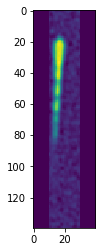

In [105]:
width = max_width
height = max_height
print(width, height)
plt.imshow(images_list_train[25].reshape(140, 40))

In [106]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import keras
#print(device_lib.list_local_devices())

config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [107]:
images_np_train = np.array(images_list_train)
images_np_test = np.array(images_list_test)

In [108]:
class_count = 5
X_train = images_np_train
Y_train = Y_tr
Y_train = keras.utils.to_categorical(Y_train, class_count)

X_test = images_np_test
Y_test = Y_ts
Y_test = keras.utils.to_categorical(Y_test, class_count)

In [109]:
X_train = X_train.reshape(X_train.shape[0], 140, 40, 1)
X_test = X_test.reshape(X_test.shape[0], 140, 40, 1)
input_shape = (140, 40, 1)

In [110]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (6832, 140, 40, 1)
6832 train samples
1953 test samples


In [116]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), input_shape=input_shape, padding="same"))
model.add(MaxPooling2D(pool_size=(3, 1)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 1)))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 4)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(class_count,activation=tf.nn.softmax))

In [117]:
#from keras.regularizers import l2
#from keras.regularizers import l1
#from keras.layers import Dropout
#inpu_dim = X_train.shape[1]
#h_1 = 3072
#h_2 = 2048
#h_3 = 1024
#h_4 = 512
#h_5 = 128
#out_shape = class_count
#
##, kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.01)
#
#input_vect = Input(shape = (inpu_dim,))
#x = BatchNormalization()(input_vect)
#x = Dropout(0.5)(x)
#x = Dense(h_1, activation="relu")(x)
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
#x = Dense(h_2, activation="relu")(x)
#x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
#x = Dense(h_3, activation="relu")(x)
#x = BatchNormalization()(x)
#x = Dropout(0.3)(x)
#x = Dense(h_4, activation="relu")(x)
#x = BatchNormalization()(x)
#x = Dropout(0.3)(x)
#x = Dense(h_5, activation="relu")(x)
#x = BatchNormalization()(x)
#x = Dropout(0.3)(x)
##x = Dense(h_4, activation="relu", kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.01))(x)
##x = BatchNormalization()(x)
##x = Dropout(0.3)(x)
#out_layer = Dense(out_shape, activation='softmax')(x)
#
#model = Model(input_vect, out_layer)

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 140, 40, 128)      1280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 46, 40, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 40, 64)        73792     
_________________________________________________________________
activation_3 (Activation)    (None, 46, 40, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 40, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 40, 32)        18464     
_________________________________________________________________
activation_4 (Activation)    (None, 15, 40, 32)        0         
__________

In [119]:
adadelta = optimizers.Adadelta(lr=0.05, rho=0.95)
model.compile(optimizer=adadelta , loss='categorical_crossentropy', metrics=['accuracy'])

In [120]:
cw = {0:1, 1:1, 2:1, 3:1, 4:1}
history = model.fit(X_train, Y_train, epochs = 35, batch_size = 32, shuffle=True, validation_data=(X_test, Y_test), class_weight=cw)

Train on 6832 samples, validate on 1953 samples
Epoch 1/35
6832/6832 [==============================] - 80s 12ms/step - loss: 1.1979 - acc: 0.5119 - val_loss: 0.9039 - val_acc: 0.6902
Epoch 2/35
6832/6832 [==============================] - 78s 11ms/step - loss: 0.8158 - acc: 0.6953 - val_loss: 0.7733 - val_acc: 0.7179
Epoch 3/35
6832/6832 [==============================] - 78s 11ms/step - loss: 0.7129 - acc: 0.7458 - val_loss: 0.6544 - val_acc: 0.7629
Epoch 4/35
6832/6832 [==============================] - 79s 11ms/step - loss: 0.6658 - acc: 0.7626 - val_loss: 0.6146 - val_acc: 0.7768
Epoch 5/35
6832/6832 [==============================] - 78s 11ms/step - loss: 0.6275 - acc: 0.7714 - val_loss: 0.5737 - val_acc: 0.7865
Epoch 6/35
6832/6832 [==============================] - 77s 11ms/step - loss: 0.6087 - acc: 0.7841 - val_loss: 0.5509 - val_acc: 0.8111
Epoch 7/35
6832/6832 [==============================] - 78s 11ms/step - loss: 0.5784 - acc: 0.7939 - val_loss: 0.5397 - val_acc: 0.8085


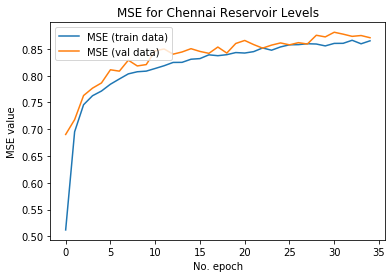

In [121]:
plt.plot(history.history['acc'], label='MSE (train data)')
plt.plot(history.history['val_acc'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [125]:
prediction = model.predict(X_train)

In [126]:
for i in range(len(prediction)):
    prediction[i] = prediction[i] > 0.5

In [128]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

this_y = Y_train
print('Accuracy:', accuracy_score(this_y, prediction))
print ('F1 score:', f1_score(this_y, prediction, average = "weighted"))
print ('Recall:', recall_score(this_y, prediction, average = "weighted"))
print ('Precision:', precision_score(this_y, prediction, average = "weighted"))
print ('\n clasification report:\n', classification_report(this_y,prediction))
print ('\n confussion matrix:\n',confusion_matrix(this_y, prediction))

Accuracy: 0.8687060889929742
F1 score: 0.8788883848395046
Recall: 0.8687060889929742
Precision: 0.8974380276285455

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1655
           1       0.80      0.49      0.61       770
           2       0.89      0.91      0.90      1525
           3       1.00      1.00      1.00       132
           4       0.95      0.96      0.96      2750

   micro avg       0.90      0.87      0.89      6832
   macro avg       0.90      0.84      0.86      6832
weighted avg       0.90      0.87      0.88      6832
 samples avg       0.87      0.87      0.87      6832



ValueError: multilabel-indicator is not supported

In [77]:
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
## serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

Saved model to disk
